In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [77]:
data = pd.read_csv("house.csv")
data.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [79]:
data.dropna(inplace=True)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [81]:
from sklearn.model_selection import train_test_split

X = data.drop(['price', 'floor'], axis=1)
Y = data['price']

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [83]:
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'bedroom_count'}>,
        <Axes: title={'center': 'net_sqm'}>],
       [<Axes: title={'center': 'center_distance'}>,
        <Axes: title={'center': 'metro_distance'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

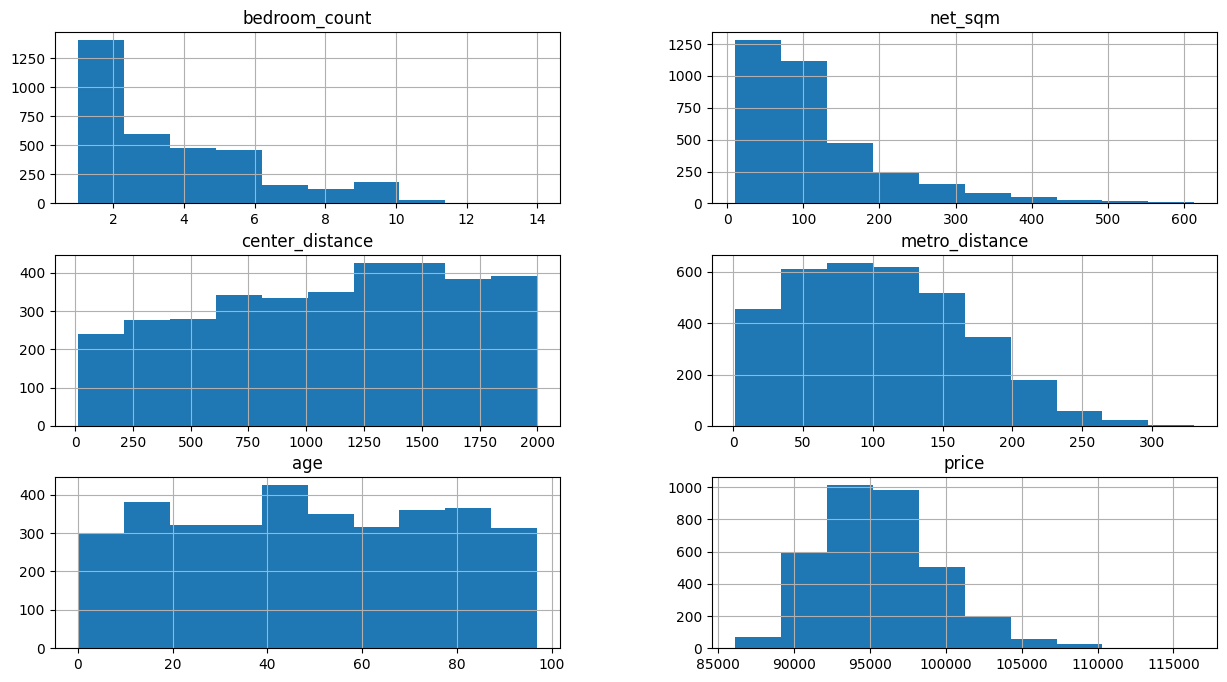

In [84]:
train_data.hist(figsize=(15,8))

<Axes: >

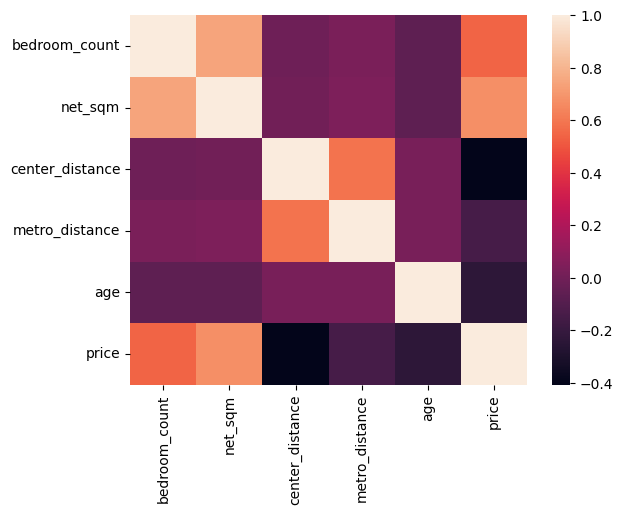

In [85]:
sns.heatmap(train_data.corr())

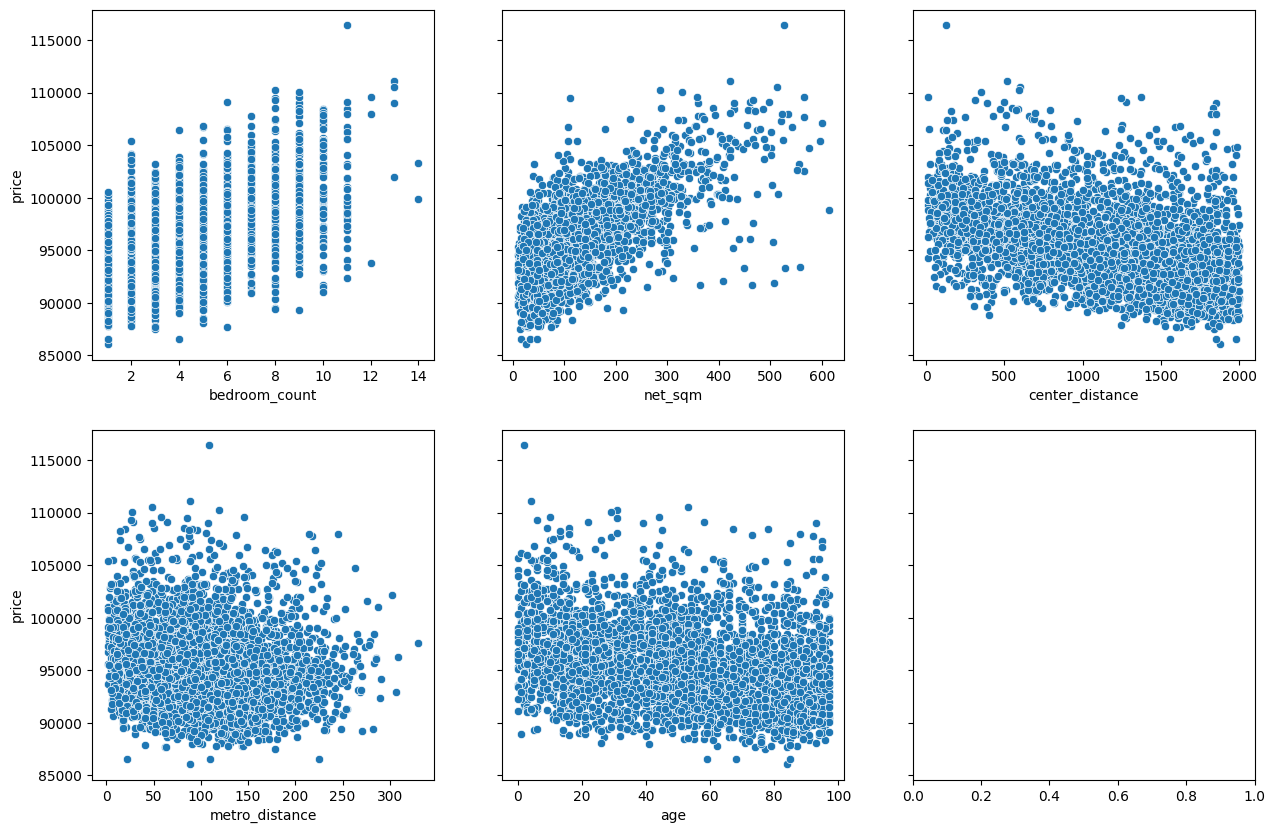

In [86]:
X_cols = ["bedroom_count", "net_sqm", "center_distance", "metro_distance", "age"]
Y_cols = "price"
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(X_cols):
    sns.scatterplot(x=col, y=Y_cols, data=train_data, ax=axes[i])


In [91]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [96]:
reg.score(X_test, Y_test)

0.7375139983310179

In [106]:
from sklearn.metrics import r2_score

predictions = reg.predict(X_test)
r2 = r2_score(Y_test, predictions)
r2

0.7375139983310179

In [108]:
import pickle
model_filename = 'housing-prices-model.pkl'
pickle.dump(reg, open(model_filename,'wb'))

In [111]:
model = pickle.load(open('housing-prices-model.pkl','rb'))
print(reg.predict([[4, 550, 1000, 250, 40]]))

[107649.32390377]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
